# <u> Introduction </u>

Hello! This is a project aimed at predicting Housing Prices. It involves creating various machine learning models and conducting exploratory data analysis (EDA) to gain insights into the dataset.

Please excuse me if there are some methods or codes that are wrong. Thank you!

The dataset used is from Kaggle. 

Dataset Credits: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

My Github Repo: https://github.com/nrsfqh/Housing_Price_Predicition_2023

My Github Page: https://github.com/nrsfqh

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as patches
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the file

housing_data = pd.read_csv('Housing.csv') 


## Data Exploration

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Check for any missing values

housing_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
#Checking for duplicated records -> Might have some houses that are keyed into the system twice?

housing_data.duplicated().value_counts()

False    545
dtype: int64

#### **Insights:**

1) There's a few categories with strings such as "Yes" and "No". Ideally, these cateogrical values can be converted to numerical values such as "1" and "2" so it would be easier to process it later on.

<space>

2) Dataset has no Missing Values and No Duplicated Records.

Let's do some Data Transformation before we move onto Visualisations

## Data Transformation

Transformations to do: 

> Encode Categorical variables


In [7]:
# Create a copy of the df to use 
housing_data2 = housing_data

# This is to get the data types that are object, in other words 'non-numerical' categories. 
obj_columns = list(housing_data2.select_dtypes(include=['object']).columns)
print("The columns that are of object type are " + str(obj_columns))


The columns that are of object type are ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [8]:
# One Hot Encoding (OHE)
df_encoded = pd.get_dummies(housing_data2, columns=obj_columns)

# Taking a look at the first five rows.
df_encoded.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [9]:
#Looking at the info. 
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    uint8
 7   mainroad_yes                     545 non-null    uint8
 8   guestroom_no                     545 non-null    uint8
 9   guestroom_yes                    545 non-null    uint8
 10  basement_no                      545 non-null    uint8
 11  basement_yes                     545 non-null    uint8
 12  hotwaterheating_no               545 non-null    u

In [10]:
# Just Checking with original df, if it matches. 

housing_data.info()

housing_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Insights:

1) Sucessfully Encoded all the seven string types to numerical through One Hot Encoding

<space>
    
2) Total enteries are unchanged at 545. No missing values 

<space>
    
3) After doing OHE, the columns have risen from 13 to 21
    
<space>
    
4) Will be using "df_encoded" from now on.

## Data Visualisation

> Unique Value Counts (Bedroom, Bathroom, Stories)

> Price Distribution

> Correlation Matrix 

> Area vs. Price

### Value Counts Graphs:

> Purpose: Provides insights into the distribution of different categories

#### Distinct numbers of Bedrooms

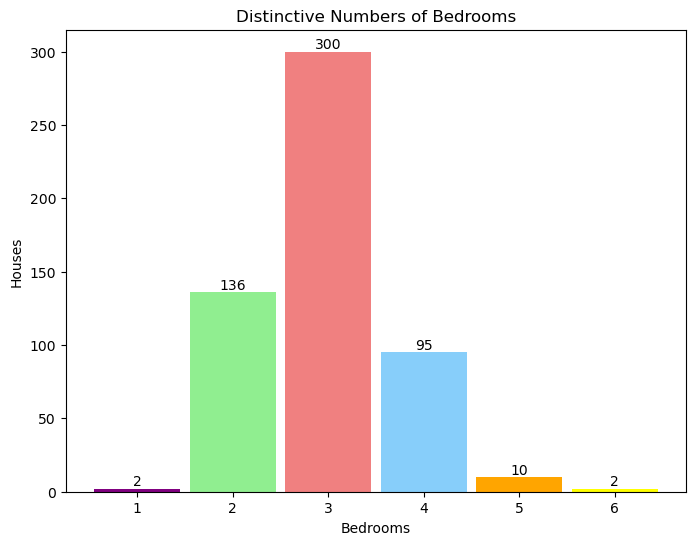

In [13]:
#Dinct. Value Counts
bedrooms = df_encoded["bedrooms"].value_counts()

# Set the figure size
plt.figure(figsize=(8, 6))

# Bar Colors
bar_colors = ["lightcoral", "lightgreen", "lightskyblue", "orange", "yellow", "purple"]

# Plot the bar graph
bars = plt.bar(bedrooms.index, bedrooms.values,width=0.9, color=bar_colors)

# Title
plt.title("Distinctive Numbers of Bedrooms")

# x-axis
plt.xlabel("Bedrooms")

# y-axis
plt.ylabel("Houses")

# To show value on top of bar graph. Loop through the patches and annotate the bars
# Get the height of the current bar and coordinate accordingly
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Display the plot
plt.show()


- Most of the Houses consists of 3 Bedrooms.
- In order from Most to Least: 3 Bedrooms, 2 Bedrooms, 4 Bedrooms, 5 Bedrooms, 6 and 1 Bedrooms (tied at 2 each).

#### Distinct numbers of Bathrooms

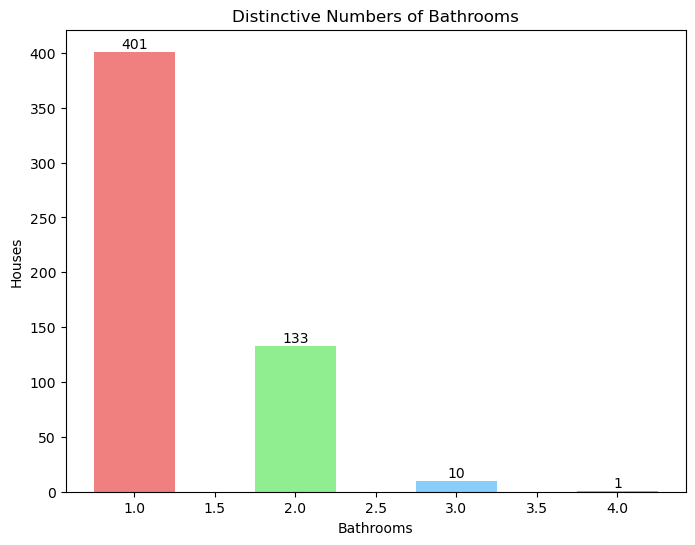

In [14]:
#Dinct. Value Counts
bathrooms = df_encoded["bathrooms"].value_counts()

# Set the figure size
plt.figure(figsize=(8, 6))

# Bar Colours
bar_colors = ["lightcoral", "lightgreen", "lightskyblue", "orange"]

# Plot the bar graph
bars = plt.bar(bathrooms.index, bathrooms.values, width=0.5, color=bar_colors)

# Title
plt.title("Distinctive Numbers of Bathrooms")

# x-axis
plt.xlabel("Bathrooms")

# y-axis
plt.ylabel("Houses")

# To show value on top of bar graph. Loop through the patches and annotate the bars
# Get the height of the current bar and coordinate accordingly
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=10)
    
# Display the plot
plt.show()


- Most of the Houses consists of 1 Bathrooms.
- In order from Most to Least: 1,2,3,4 Bathrooms.

#### Distinct numbers of Stories

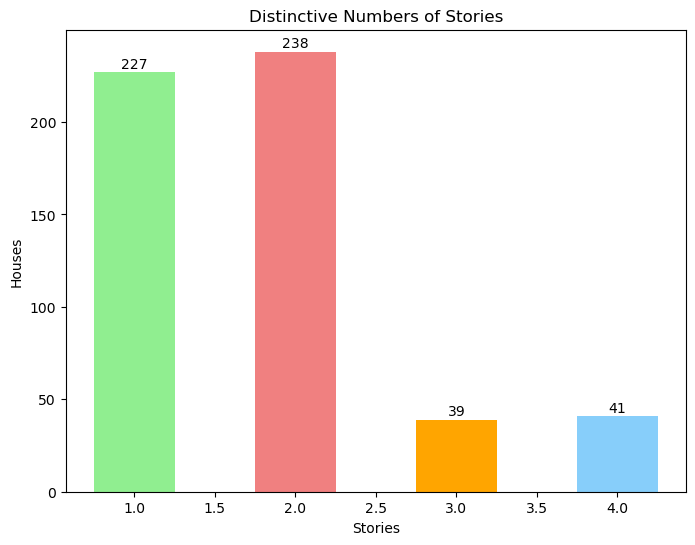

In [15]:
#Dinct. Value Counts
stories = df_encoded["stories"].value_counts()

# Set the figure size
plt.figure(figsize=(8, 6))

# Bar Colours
bar_colors = ["lightcoral", "lightgreen", "lightskyblue", "orange"]

# Plot the bar graph
bars = plt.bar(stories.index, stories.values, width=0.5, color=bar_colors)

# Title
plt.title("Distinctive Numbers of Stories")

# x-axis
plt.xlabel("Stories")

# y-axis
plt.ylabel("Houses")

# To show value on top of bar graph. Loop through the patches and annotate the bars
# Get the height of the current bar and coordinate accordingly
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)), 
             ha='center', va='bottom', fontsize=10)
    
# Display the plot
plt.show()


- Most of the Houses are 2 Stories.
- In order from Most to Least: 2,1,4,3 Stories.

#### **Insights:**

1) The majority of houses in the dataset consist of 3 bedrooms.

2) Most of the houses in the dataset have 1 bathroom.

3) The majority of houses in the dataset are two-story homes.

### Correlation Matrix

<Axes: title={'center': 'Correlation Matrix'}>

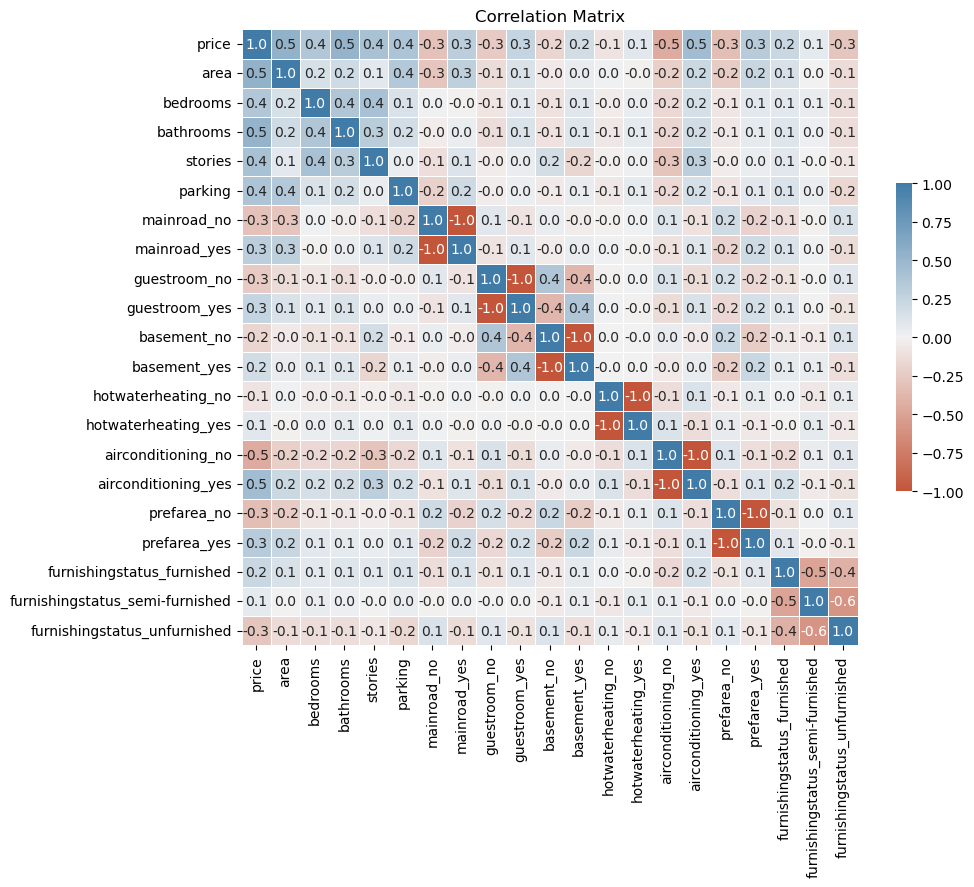

In [16]:
# Compute the correlation matrix
corr = df_encoded.corr()

# Set up the figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 240, as_cmap=True)

# Title
plt.title("Correlation Matrix")

# Draw the heatmap with the mask and correct aspect ratio. Annotation shows the number.
sns.heatmap(corr, cmap=cmap,  center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")

In [17]:
# Display the ranking of columns based on their correlation with 'price'
price_corr = corr["price"].sort_values(ascending=False)

print("Factors that affect price: ")
print(price_corr)

Factors that affect price: 
price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
furnishingstatus_furnished         0.229350
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
hotwaterheating_no                -0.093073
basement_no                       -0.187057
guestroom_no                      -0.255517
furnishingstatus_unfurnished      -0.280587
mainroad_no                       -0.296898
prefarea_no                       -0.329777
airconditioning_no                -0.452954
Name: price, dtype: float64


#### **Insights:**

1) The top 2 highest factors that affect the price (>0.5) the most are the area and bathroom.These have the strongest positive correlations.

<space>

2) Air conditioning, stories, parking  and bedroom shows moderate positive correlations (>0.35 - 0.49) with the price. Houses with these factors will also have higher prices.
    
<space>

3) Factors that shows weak positive correlation are pref area, mainroad, guestroom, basement and hot water heating. These have very minimal impact on pricing.
    
<space>

4) Furnishing Status has little to no effect whatsoever to the price as it is a negative correlation.

### Area Vs Price:

> Purpose: Explore the relationship between the area of the house and its price. 

> Hypothetically, the more the area, the higher the price.

In [11]:
# Firstly, let's just see what's the lowest and highest Price

lowest_price = df_encoded["price"].min()
highest_price = df_encoded["price"].max()
print("Lowest Price:", lowest_price)
print("Highest Price:", highest_price)

# And the smallest & largest area
smallest_area = df_encoded["area"].min()
largest_area = df_encoded["area"].max()
print("Smallest Area:", smallest_area)
print("Largest Area:", largest_area)

Lowest Price: 1750000
Highest Price: 13300000
Smallest Area: 1650
Largest Area: 16200


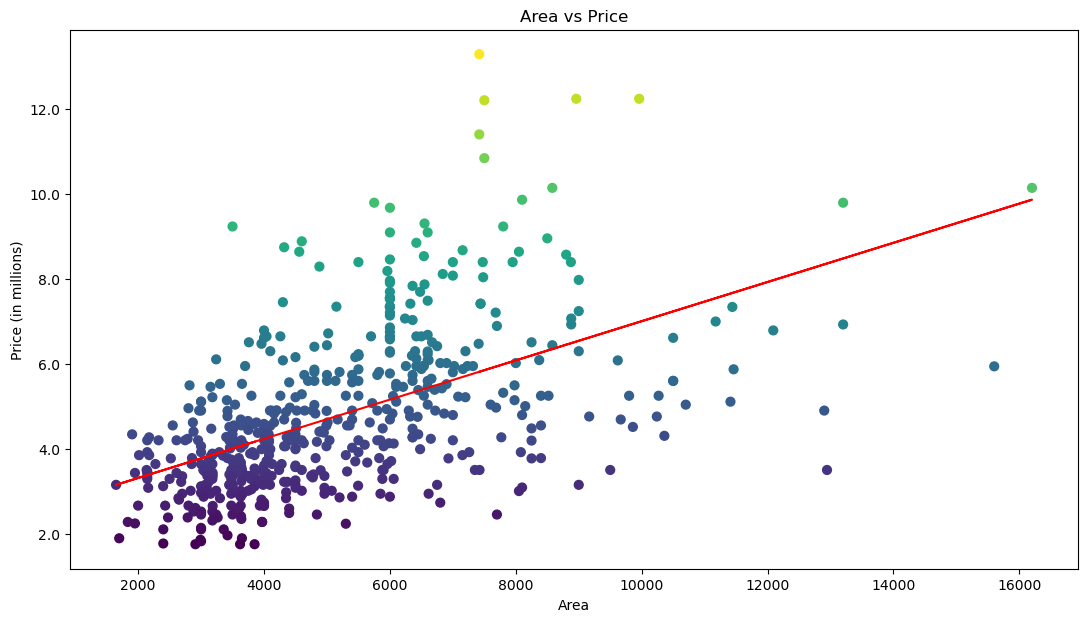

In [12]:
# Plot Adjustment
plt.figure(figsize=(13, 7) ,facecolor="white", edgecolor="black")

# Creating the Scatter plot
plt.scatter(df_encoded["area"], df_encoded["price"], c=df_encoded["price"], cmap="viridis", s=40)

# Creating Best Fit (Regression) Line

# Need to find the coefficient first
coefficients = np.polyfit(df_encoded["area"], df_encoded["price"], 1)

# Plotitng the line
plt.plot(df_encoded["area"], df_encoded["area"] * coefficients[0] + coefficients[1], color="red")

# Title
plt.title("Area vs Price")

# x-axis
plt.xlabel("Area")

# y-axis
plt.ylabel("Price (in millions)")

# Custom FuncFormatter
def millions_formatter(x, pos):
    return f'{x / 1000000}'

# Formatting Y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


#### **Insights:**

1) Based on the best fit line, the bigger the area of the house, the higher the price. This supports my hypothesis. This also suggests a positive correlation between the area and price. As the area increases, the price tends to increase as well. The increasing trend line indicates that larger houses generally have higher prices.

<space>

2) However, there are some outliers in the data. Some houses with an area around 8000 sells for more than 10 million, and a house with an area of 16000 sells for an estimated value of 5 million. These outliers does not follow the general trend. These houses may have unique factors influencing their prices beyond the 'area' alone.



### Outliers

> Purpose: Remove the outliers identified in Area Vs Price Graph

In [18]:
# Current shape
print(df_encoded.shape)

(545, 21)


In [19]:
# Q1 and Q3
Q1 = df_encoded["area"].quantile(0.25)
Q3 = df_encoded["area"].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

# Find the lower & upper bounds
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR 

# Identify rows that are outliers
outliers_mask = np.logical_or(df_encoded['area'] < lower, df_encoded['area'] > upper)

# Filter out the rows with outliers
df_encoded = df_encoded[~outliers_mask]

In [20]:
# New Shape
print(df_encoded.shape)

(533, 21)


#### **Note:**

1) New data only has 533 enteries. 12 Enteries have been removed which is around ~2%

## Data Splitting

In [21]:
# Y is target (Price), so in X, we will drop the price
X = df_encoded.drop(["price"], axis=1)
y = df_encoded["price"]

#Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 20) (107, 20) (426,) (107,)


## Normalization

> Purpose: Scale numerical features

In [22]:
# Perform Min Max Scaler

# Call minmaxscaler
scaler = MinMaxScaler()

# Fit
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

I will be doing a few different types of ML Algorithm and do a comparision later on.

> Linear Regression

> Ridge Regression

> Decision tree Regression

> Random forest Regression

> Gradient Boosting

> Mix of GB + RFR

### Linear Regression

In [23]:
# Call the Linear Regression model
LR_model = LinearRegression()

# Fit the model to the (scaled) training data
LR_model.fit(X_train_scaled, y_train)

# Print
print("LR Train Score:  %.5f" % LR_model.score(X_train_scaled,y_train))
print("LR Testing Score:  %.5f" % LR_model.score(X_test_scaled,y_test))

LR Train Score:  0.69309
LR Testing Score:  0.55818


In [24]:
# Predict on the test data
y_pred_LR = LR_model.predict(X_test_scaled)

In [25]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred_LR)

# Calculate R-squared (R2)
LR_r2 = r2_score(y_test, y_pred_LR)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, y_pred_LR)

# Calculate Explained Variance Score
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, y_pred_LR)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", LR_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)

R2: 0.5581836492450291


### Ridge Regression

In [26]:
# Call the Ridge Regression model
ridge_model = Ridge(random_state=11)

# Define range to test (can try changing)
param_grid = {"alpha": [0.01, 0.1, 1, 10, 120]}

cv = KFold(n_splits=5, shuffle=True, random_state=11)

# GridSearchCV 
gridsearch_ridge = GridSearchCV(ridge_model, param_grid, cv=cv, n_jobs=-1)

# Fit the model to the (scaled) training data# Fit the model to the (scaled) training data
gridsearch_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Ridge(random_state=11), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 120]})

In [27]:
# Get and use the best model
best_ridge_model = gridsearch_ridge.best_estimator_

In [28]:
# Print the results
print("Ridge Train Score: %.5f" % best_ridge_model.score(X_train_scaled, y_train))
print("Ridge Testing Score: %.5f" % best_ridge_model.score(X_test_scaled, y_test))

Ridge Train Score: 0.69243
Ridge Testing Score: 0.57078


In [29]:
# Predict on the test data
y_pred_Ridge = best_ridge_model.predict(X_test_scaled)

In [30]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred_Ridge)

# Calculate R-squared (R2)
RR_r2 = r2_score(y_test, y_pred_Ridge)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, y_pred_Ridge)

# Calculate Explained Variance Score
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, y_pred_Ridge)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", RR_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)

R2: 0.5707815662141529


### Decision Tree Regression (DTR)

In [31]:
# Set up some hyperparameters for the Decision Tree
hyperparameters = {
    "max_depth": np.random.randint(5, 15),"min_samples_split": np.random.randint(3, 11),
    "min_samples_leaf": np.random.randint(3, 5),"criterion": np.random.choice(["absolute_error"]),"random_state": 11
}

# Call / Create DTR
dtr = DecisionTreeRegressor(**hyperparameters)


In [32]:
# Fit the model to the (scaled) training data
dtr_model=dtr.fit(X_train_scaled, y_train)

# Print Results
print("DTR Train Score:  %.2f" % dtr_model.score(X_train_scaled,y_train))
print("DTR Test Score:  %.5f" % dtr_model.score(X_test_scaled,y_test))

DTR Train Score:  0.79
DTR Test Score:  0.14039


In [33]:
# Predict on the test data
y_pred_DTR = dtr_model.predict(X_test_scaled)

In [34]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred_DTR)

# Calculate R-squared (R2)
DTR_r2 = r2_score(y_test, y_pred_DTR)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, y_pred_DTR)

# Calculate Explained Variance Score
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, y_pred_DTR)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", DTR_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)


R2: 0.14038511802104658


### Random Forest Regression (RFR)

In [35]:
# Set up some parameters for Random Forest 

rfr_params = {"n_estimators": range(10, 220, 20), "max_depth": [None, 5, 10, 20], "min_samples_split": [2, 5, 15],
    "min_samples_leaf": [1, 2, 6], "max_features": ["auto", "sqrt", "log2"]}

# Call RFR
rfr = RandomForestRegressor(random_state=11)

# GridSearchCV 
gridsearch_rfr = GridSearchCV(rfr, rfr_params, cv=5, n_jobs=-1)

In [36]:
# Fit the model to the (scaled) training data
gridsearch_rfr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=11), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 5, 15],
                         'n_estimators': range(10, 220, 20)})

In [37]:
# Get and use the best model
best_model_rfr = gridsearch_rfr.best_estimator_

# Print Results
print("RFR Train Score:  %.5f" % best_model_rfr.score(X_train_scaled,y_train))
print("RFR Testing Score: %.5f" % best_model_rfr.score(X_test_scaled, y_test))


RFR Train Score:  0.92646
RFR Testing Score: 0.61962


In [38]:
# Predict on the test data
y_pred_RFR2 = best_model_rfr.predict(X_test_scaled)

In [39]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred_RFR2)

# Calculate R-squared (R2)
RFR_r2 = r2_score(y_test, y_pred_RFR2)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, y_pred_RFR2)

# Calculate Explained Variance Scorey_pred_RFR2
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, y_pred_RFR2)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", RFR_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)


R2: 0.6196153315063231


### Gradient Boosting Regressor (GBR)

In [40]:
# Define the parameters for GBR
param_grid_gbr = {"n_estimators": range(10, 220, 20),"learning_rate": [0.05, 0.1, 0.2],"max_depth": [None, 5, 10, 20],
                  "min_samples_split": [2, 5, 15], "min_samples_leaf": [1, 2, 6]}

# Call / Create GBR
gbr = GradientBoostingRegressor(random_state=11)

# GridSearchCV
gridsearch_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, n_jobs=-1)

In [41]:
# Fit the model to the (scaled) training data
gridsearch_gbr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=11),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 5, 15],
                         'n_estimators': range(10, 220, 20)})

In [42]:
# Get and use the best model
best_model_gbr = gridsearch_gbr.best_estimator_

# Print the scores for the best model
print("GBR Train Score (Best Model): %.5f" % best_model_gbr.score(X_train_scaled, y_train))
print("GBR Testing Score (Best Model): %.5f" % best_model_gbr.score(X_test_scaled, y_test))

GBR Train Score (Best Model): 0.90843
GBR Testing Score (Best Model): 0.54489


In [43]:
# Predict on the test data
y_pred_GBR = best_model_gbr.predict(X_test_scaled)

In [44]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_pred_GBR)

# Calculate R-squared (R2)
GB_r2 = r2_score(y_test, y_pred_GBR)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, y_pred_GBR)

# Calculate Explained Variance Scorey_pred_RFR2
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, y_pred_GBR)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", GB_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)


R2: 0.5448928432782688


### Combination of GB + RFR

In [45]:
# Combine BOTH GB + RFR
GB_RFR_Combo = np.column_stack((y_pred_RFR2, y_pred_GBR))

# Still use RFR as the Final model
final_model = RandomForestRegressor(random_state=11)

# Fit the model to the (scaled) training data
# Use GB_RFR_Combo because both y_pred_RFR2 and y_pred_GBR
# have already been fitted to X_test_scaled previously
final_model.fit(GB_RFR_Combo, y_test)

RandomForestRegressor(random_state=11)

In [46]:
# Predict on the test data
final_predictions = final_model.predict(GB_RFR_Combo)

In [47]:
# Calculate Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, final_predictions)

# Calculate R-squared (R2)
GBG_RFA_r2 = r2_score(y_test, final_predictions)

# Calculate Mean Absolute Error (MAE)
#mae = mean_absolute_error(y_test, final_predictions)

# Calculate Explained Variance Scorey_pred_RFR2
# Dispersion of errors of a given dataset -> Good is not less than 60%
#explained_variance = explained_variance_score(y_test, final_predictions)

# Print the evaluation metrics
#print("Mean Squared Error (MSE): ", mse)
#print("Root Mean Squared Error (RMSE):", mse**0.5)  # Square root of MSE
print("R2:", GBG_RFA_r2)
#print("Mean Absolute Error (MAE):", mae)
#print("Explained Variance Score:", explained_variance)


R2: 0.9406865400984384


## Model Evaluation

In [48]:
r2_scores_comparision = {
    "Model": ["Linear Regression (LR)", "Ridge Regression (RR)","Decision tree Regression (DTR)", 
              "Random Forest Regression (RFR)", "Gradient Boosting (GB)", "Mix of GB + RFR"],
    "R2 Score": [LR_r2, RR_r2, DTR_r2, RFR_r2, GB_r2, GBG_RFA_r2]
}

# Convert the dictionary to pandas df
r2_scores_df = pd.DataFrame(r2_scores_comparision)

# Print the DataFrame
print(r2_scores_df)


                            Model  R2 Score
0          Linear Regression (LR)  0.558184
1           Ridge Regression (RR)  0.570782
2  Decision tree Regression (DTR)  0.140385
3  Random Forest Regression (RFR)  0.619615
4          Gradient Boosting (GB)  0.544893
5                 Mix of GB + RFR  0.940687


#### **Insights:**

1) Firstly, a higher R2 value means a better fit to the data.

<space>

2) Using a mixture of Gradient Boosting and Random Forest Regression proved to be the best with a 94% accuracy. This is very high and will be further explored below. Is the data actually accurate?

<space>

3) RFR is the second Model with the highest R2 score and 61% accuracy.
    
<space>

4) LR, RR and GB perform decent as it has more than 50% accuracy
    
<space>

5) DTR has the worst performance and has 36% accuracy

In [49]:
# Let's only see two random index
selected_indices = [2, 10]

# Creating a df and comparing the actual vs predicted for the Mix ML
comparision_df = pd.DataFrame({"Actual Price": y_test, 
                                           "Predicted Price (GB + RFR)": final_predictions,
                                          "Predicted Price (RFR)": y_pred_RFR2})

# New column to measure the Difference for Actual - Mix (GB + RFR)
comparision_df["Differences (Mix)"] = comparision_df["Actual Price"] - comparision_df["Predicted Price (GB + RFR)"] 

# New column to measure the Difference for Actual - RFR
comparision_df["Differences (RFR)"] = comparision_df["Actual Price"] - comparision_df["Predicted Price (RFR)"] 

# Reset the index of the DataFrame
comparision_df.reset_index(drop=True, inplace=True)

# Select these index
comparision_df = comparision_df.loc[selected_indices]

# Display the DataFrame
print(comparision_df)

# Format 
pd.options.display.float_format = '{:,.2f}'.format


    Actual Price  Predicted Price (GB + RFR)  Predicted Price (RFR)  \
2        4200000                   4087860.0           4.279395e+06   
10       5565000                   5525450.0           5.718144e+06   

    Differences (Mix)  Differences (RFR)  
2            112140.0      -79394.778819  
10            39550.0     -153144.071294  


#### **Insights:**

(Taking into consideration the absolute difference)

1) Let's take Index 2 for example, the difference between the Actual and Mix is 112,140. While the difference between Actual and RFR is |-79,394| = 79,394. Hence, RFR is much closer to the Actual.

<space>

2) Simillarly, For Index 2, Mix is much closer to Actual than RFR.
    
3) It's hard to determine for certain which of the two is more "Accurate" as it might differ depending on the index. Thus, let's take one last look at the metrics for comparision

### Comparing Metrics

In [50]:
## Comparing Matrics

# Calculate Mean Squared Error (MSE)
RFR_mse = mean_squared_error(y_test, y_pred_RFR2)
GBG_RFA_mse = mean_squared_error(y_test, final_predictions)

# Calculate R-squared (R2)
RFR_r2 = r2_score(y_test, y_pred_RFR2)
GBG_RFA_r2 = r2_score(y_test, final_predictions)


# Calculate Mean Absolute Error (MAE)
RFR_mae = mean_absolute_error(y_test, y_pred_RFR2)
GBG_RFA_mae = mean_absolute_error(y_test, final_predictions)

# Calculate Explained Variance Scorey_pred_RFR2
# Dispersion of errors of a given dataset -> Good is not less than 60%
RFR_explained_variance = explained_variance_score(y_test, y_pred_RFR2)
GBG_RFA_explained_variance = explained_variance_score(y_test, final_predictions)

# RMSE Code
RFR_rmse = RFR_mse**0.6
GBG_RFA_rmse = GBG_RFA_mse**0.5


In [51]:
# New DF
metrics_df = pd.DataFrame({
    "RFR": [RFR_mse, RFR_r2, RFR_mae, RFR_rmse],
    "Mix (GB + RFR)": [GBG_RFA_mse, GBG_RFA_r2, GBG_RFA_mae, GBG_RFA_rmse]})

# Set index
metrics_df.index = ["MSE", "R2", "MAE","RMSE"]


# Print
print(metrics_df)

                      RFR     Mix (GB + RFR)
MSE  1,056,606,415,632.38 164,756,856,561.86
R2                   0.62               0.94
MAE            722,102.30         296,795.62
RMSE        16,381,284.24         405,902.52


#### **Insights:**

1) MSE -> Firstly, Mean Squared Error measures the average squared difference between the actual and predicted values. Lower MSE means better model performance. Here, the Mix model has a significantly lower MSE compared to RFR which means the Mix model is performing better and has lesser prediction errors.

<space>

2) R2 -> As established earlier, Higher R2 is better as it shows a better fit to the data. Here, the Mix model has a higher R2 value of 0.94 compared to the RFR model which is 0.62.
    
<space>
    
3) MAE -> Mean Absolute Error measures the average absolute difference between the actual and predicted values. Lower value is better. Here, Mix model has a lower MAE (296,795.62) compared to RFR (722,102.30) which shows that it is making more accurate predictions than RFR model.
    
<space>
    
4) RMSE -> Root Mean Squared Error is the square root of the Mean Squared Error. It measures the average magnitude of the prediction errors. Lower value is better. Here, the Mix model has a lower RMSE (405,902.52) compared to RFR (16,381,284.24).

<space>
    
5) Based on all the comparisions above, the Mix of Gradient Boosting and Random Forest Regression model outperform the RFR model in all of the metrics. This shows that the Mix model is a better choice for predicting the target variable.

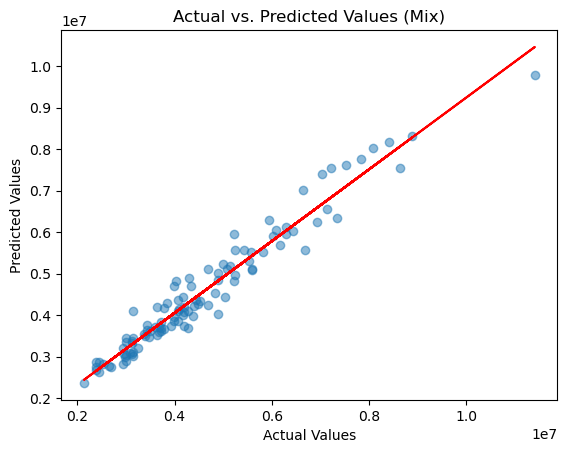

In [52]:
# Just a plot to show

# Plot actual vs. predicted values
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Mix)")

# Creating Best Fit (Regression) Line
# Need to find the coefficient first
coefficients = np.polyfit(y_test, final_predictions, 1)
best_fit = np.polyval(coefficients, y_test)

# Plotting the line
plt.plot(y_test, best_fit, color="red", label="Line of Best Fit")


# Display the plot
plt.show()




#### **Insights:**

1) Once again, the dots in the scatter plot are close to the best fit line. This indicates that the predicted values are close to the actual values. Hence, making the Mix model accurate and reliable.

## Conclusion


1) Out of all the Models I have done, using a mixture of Random Forest Regression and Gradient Boosting turned out to be the best and even had a very high accuracy score of 94%.

<Space>

2) Initially, I was very worried because the dataset only contained 545 samples which is quite small to be used for predicting. Most of the models I have trained during my earlier stages were hitting around 50-60% accuracy even after Data Transformation. I am glad I was able to use a mixture of models to generate a higher accuracy.